In [ ]:
import pandas as pd
from io import StringIO


# Convertir la cadena CSV en un dataframe
train_base = pd.read_csv('train.csv')
print(train_base.columns, train_base.shape)
test_base = pd.read_csv('test.csv')
print(test_base.columns, test_base.shape)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object') (8693, 14)
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object') (4277, 13)


In [ ]:
#categorice to numeric
train = train_base.copy()
test = test_base.copy()

#factorize homeplanet
train['HomePlanet'] ,HomePlanet = pd.factorize(train_base['HomePlanet'])
#use homeplanet to factorize test
test['HomePlanet'] = test_base['HomePlanet'].map(lambda s: len(HomePlanet) if s not in HomePlanet else HomePlanet.get_loc(s))
print(HomePlanet)

#factorize Destination
train['Destination'] ,Destination = pd.factorize(train_base['Destination'])
#use Destination to factorize test
test['Destination'] = test_base['Destination'].map(lambda s: len(Destination) if s not in Destination else Destination.get_loc(s))
print(Destination)

#factorize Cabin
train['Cabin'] ,Cabin = pd.factorize(train_base['Cabin'])
#use Cabin to factorize test
test['Cabin'] = test_base['Cabin'].map(lambda s: len(Cabin) if s not in Cabin else Cabin.get_loc(s))
print(Cabin)

train, test

Index(['Europa', 'Earth', 'Mars'], dtype='object')
Index(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype='object')
Index(['B/0/P', 'F/0/S', 'A/0/S', 'F/1/S', 'F/0/P', 'F/2/S', 'G/0/S', 'F/3/S',
       'B/1/P', 'F/1/P',
       ...
       'G/1505/P', 'G/1497/S', 'G/1507/P', 'F/1894/P', 'G/1508/P', 'A/97/P',
       'A/98/P', 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype='object', length=6560)


(     PassengerId  HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
 0        0001_01           0     False      0            0  39.0  False   
 1        0002_01           1     False      1            0  24.0  False   
 2        0003_01           0     False      2            0  58.0   True   
 3        0003_02           0     False      2            0  33.0  False   
 4        0004_01           1     False      3            0  16.0  False   
 ...          ...         ...       ...    ...          ...   ...    ...   
 8688     9276_01           0     False   6556            2  41.0   True   
 8689     9278_01           1      True   6557            1  18.0  False   
 8690     9279_01           1     False   6558            0  26.0  False   
 8691     9280_01           0     False   6559            2  32.0  False   
 8692     9280_02           0     False   6559            0  44.0  False   
 
       RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
 0  

In [ ]:
test['HomePlanet'].unique(), test['Destination'].unique(), test['Cabin'].unique()

(array([1, 0, 2, 3]), array([0, 2, 1, 3]), array([6560]))

In [54]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,1,True,6560,0,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,1,False,6560,0,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,0,True,6560,2,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,0,False,6560,0,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,1,False,6560,0,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,True,6560,0,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,1,False,6560,0,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,2,True,6560,2,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,0,False,6560,3,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [ ]:
#remove columns dont have relevance information
train = train[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]

                   Age  RoomService  FoodCourt  ShoppingMall       Spa  \
Age           1.000000     0.068723   0.130421      0.033133  0.123970   
RoomService   0.068723     1.000000  -0.015889      0.054480  0.010080   
FoodCourt     0.130421    -0.015889   1.000000     -0.014228  0.221891   
ShoppingMall  0.033133     0.054480  -0.014228      1.000000  0.013879   
Spa           0.123970     0.010080   0.221891      0.013879  1.000000   
VRDeck        0.101007    -0.019581   0.227995     -0.007322  0.153821   
Transported  -0.075026    -0.244611   0.046566      0.010141 -0.221131   

                VRDeck  Transported  
Age           0.101007    -0.075026  
RoomService  -0.019581    -0.244611  
FoodCourt     0.227995     0.046566  
ShoppingMall -0.007322     0.010141  
Spa           0.153821    -0.221131  
VRDeck        1.000000    -0.207075  
Transported  -0.207075     1.000000  


/tmp/ipykernel_32/1450863309.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


<AxesSubplot: >

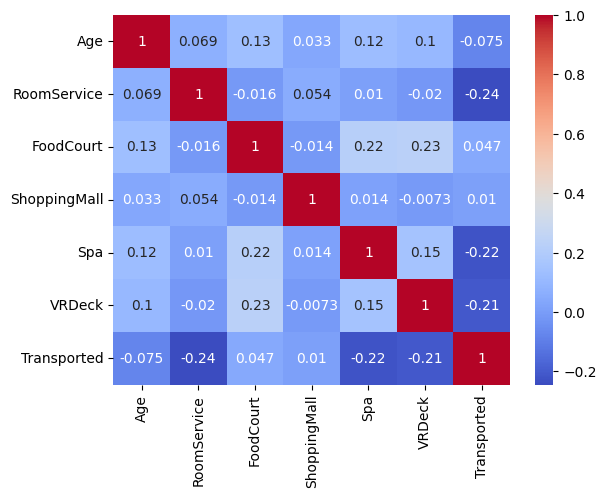

In [5]:
import seaborn as sns

# Calcular la matriz de correlación
corr_matrix = train.corr()
print(corr_matrix)
# Crear el gráfico de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


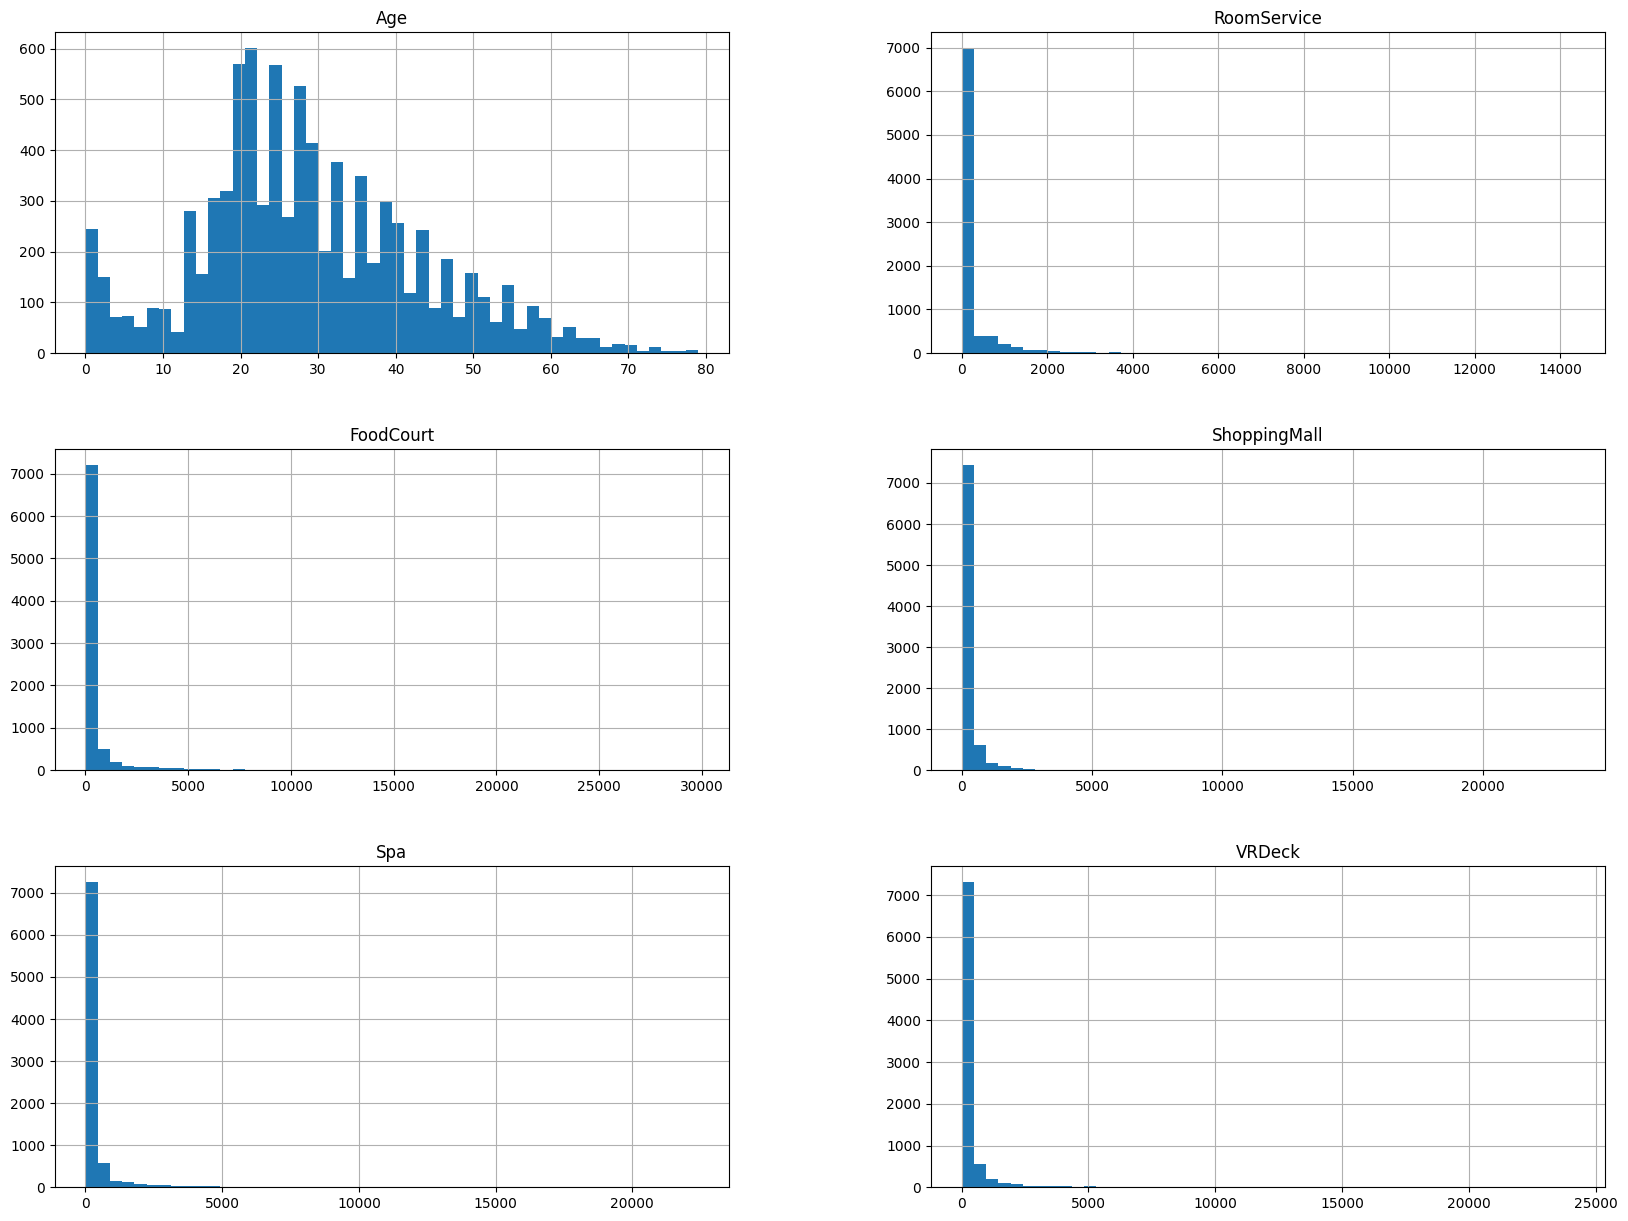

In [11]:
#generate histogram for each numeric variable

import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
plt.show()


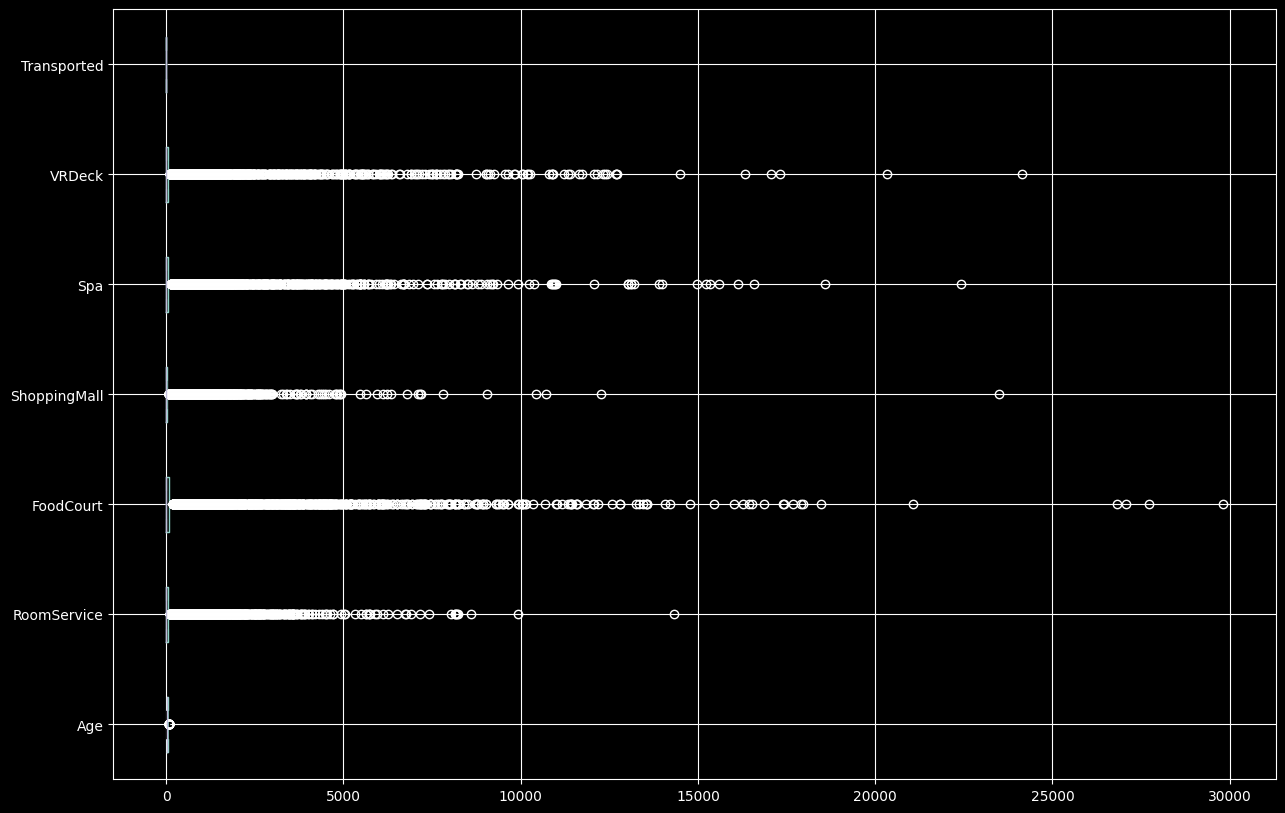

In [21]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
# draw boxplots for all numeric columns horizontally
train.boxplot(vert=False, figsize=(15,10))
plt.show()

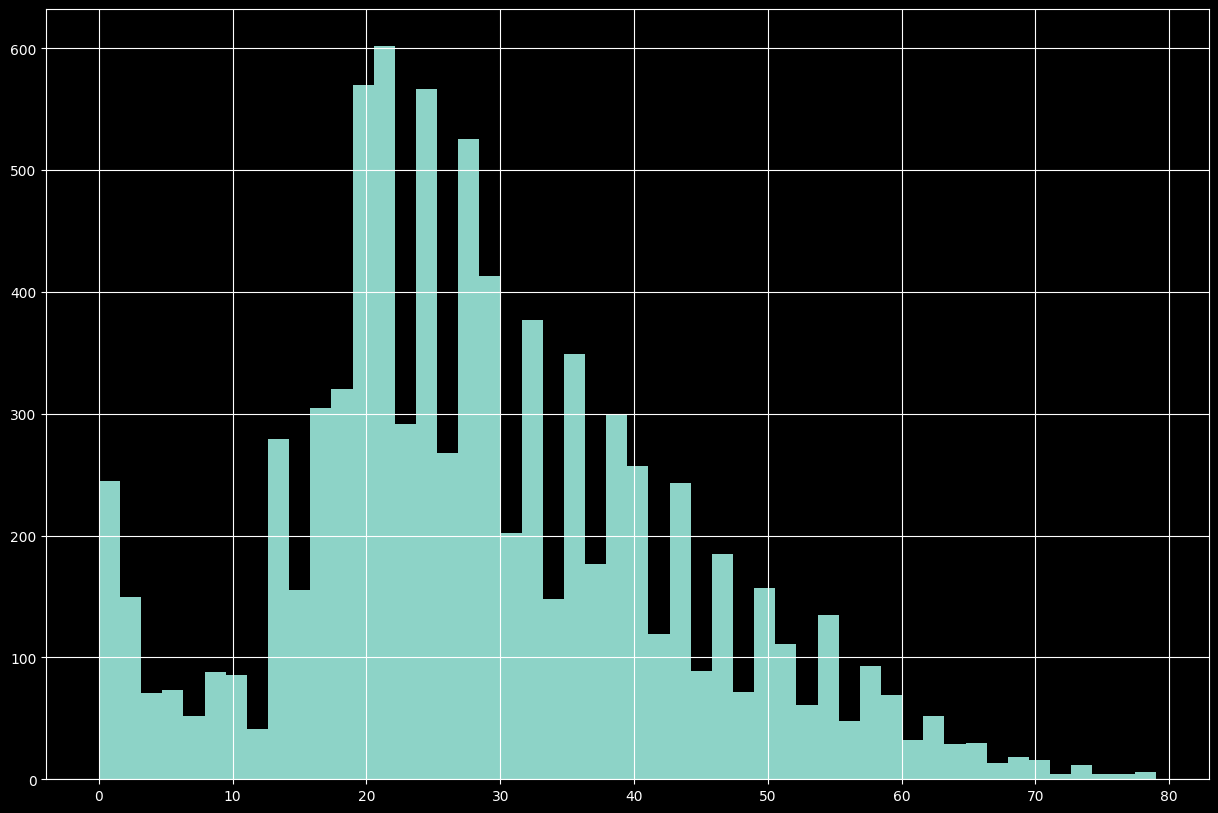

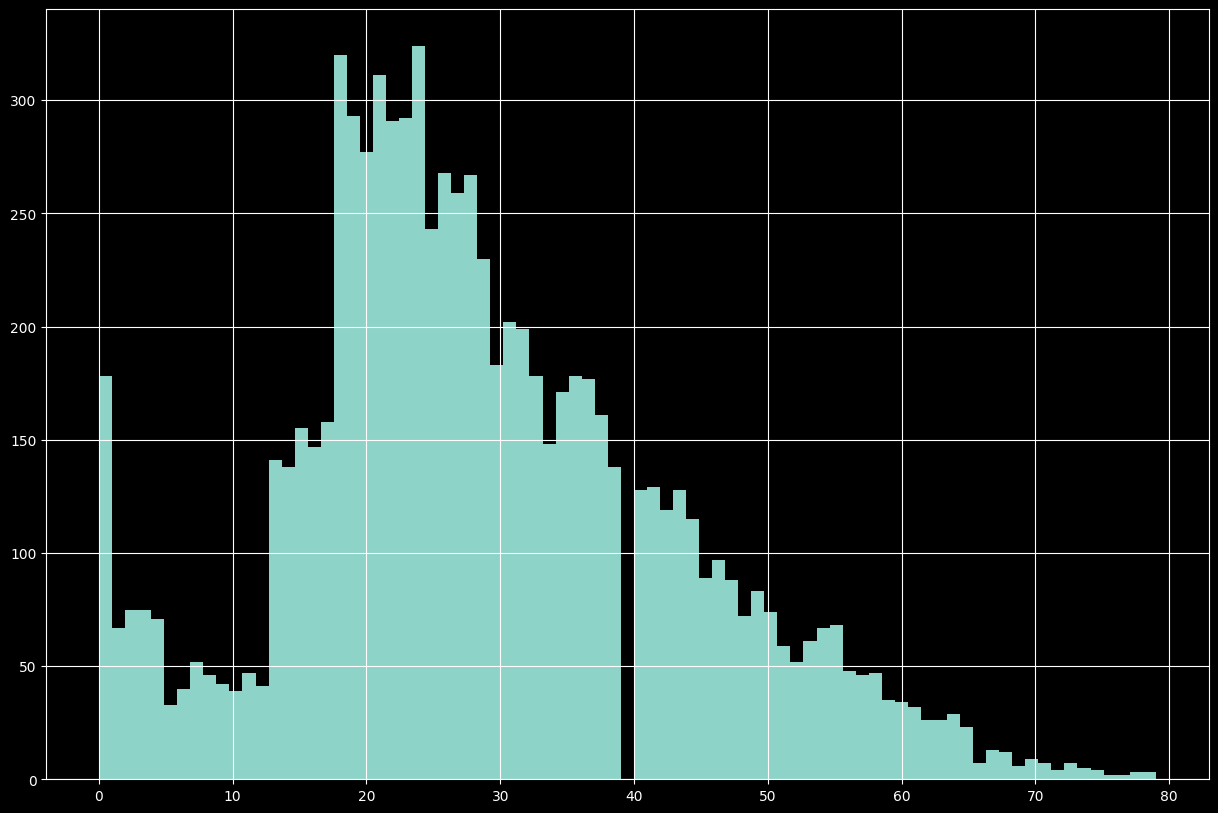

In [22]:
#age Analysis
# Age histogram
train['Age'].hist(bins=50, figsize=(15,10))
plt.show()
#unique values histogram
train['Age'].hist(bins=len(train['Age'].unique()), figsize=(15,10))
plt.show()

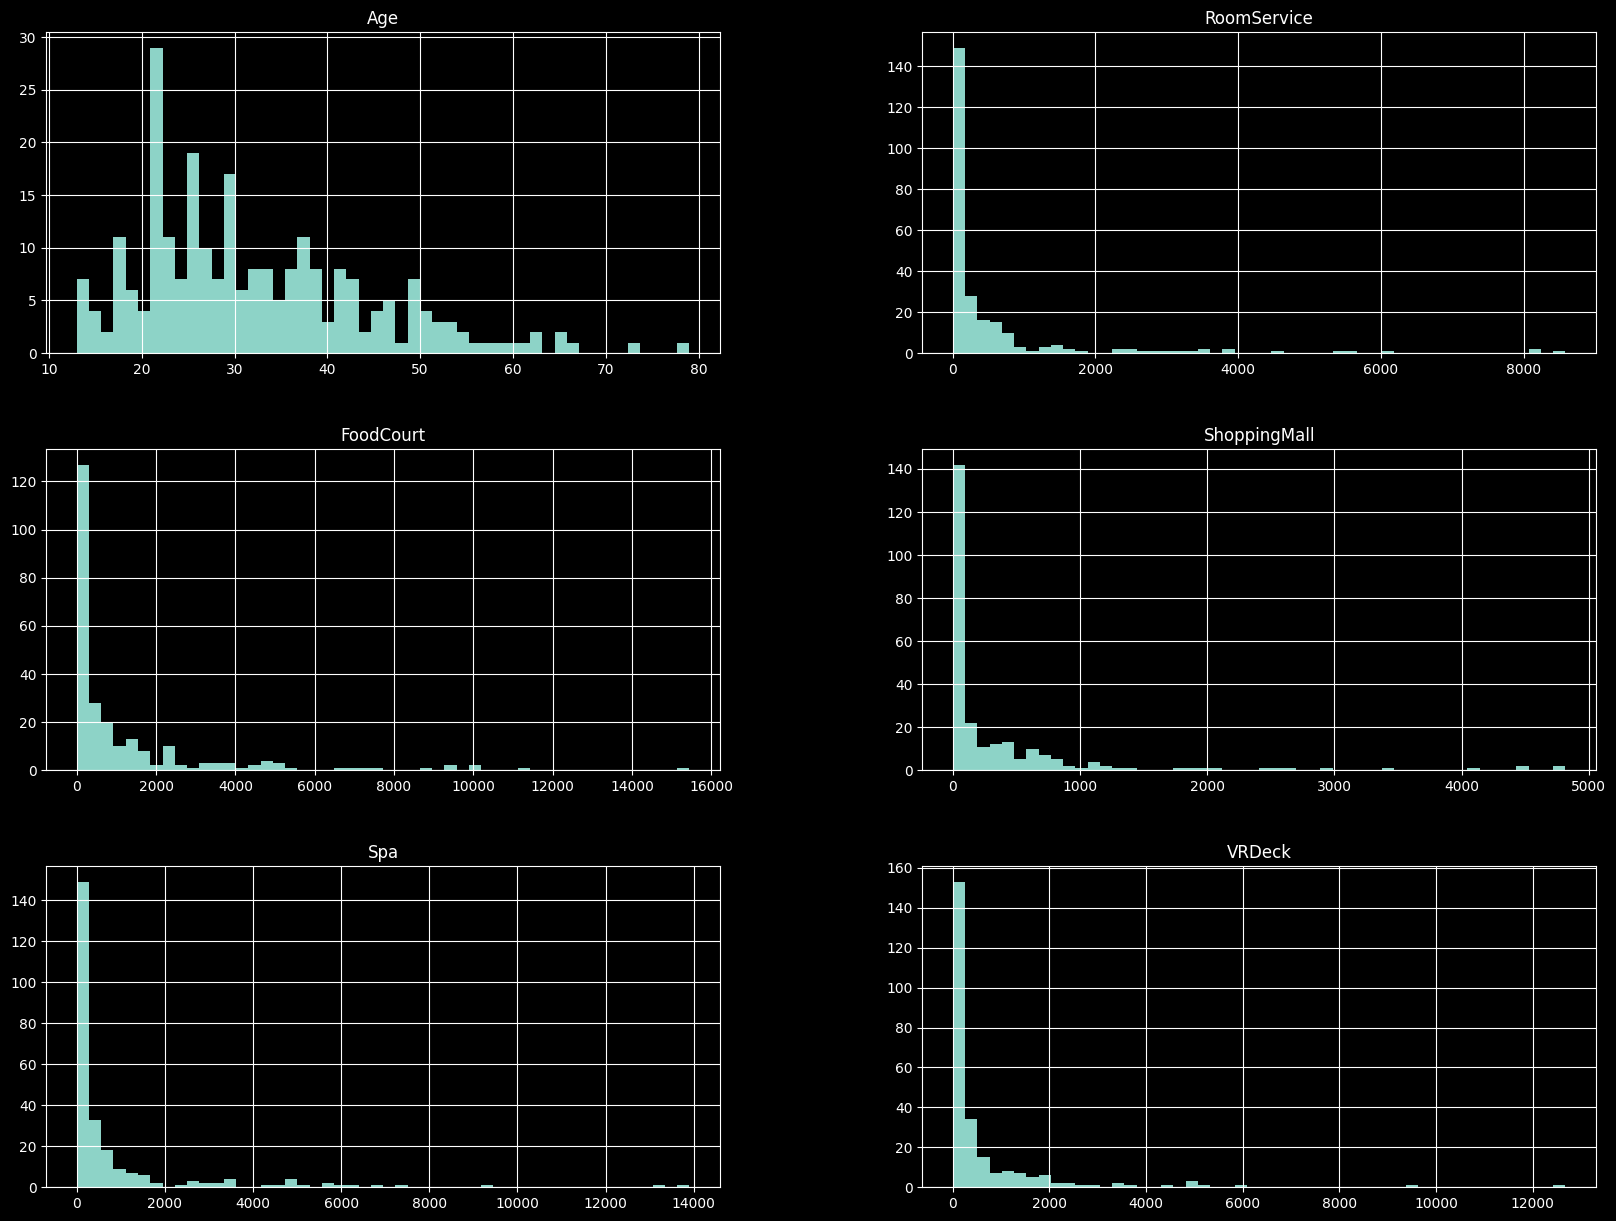

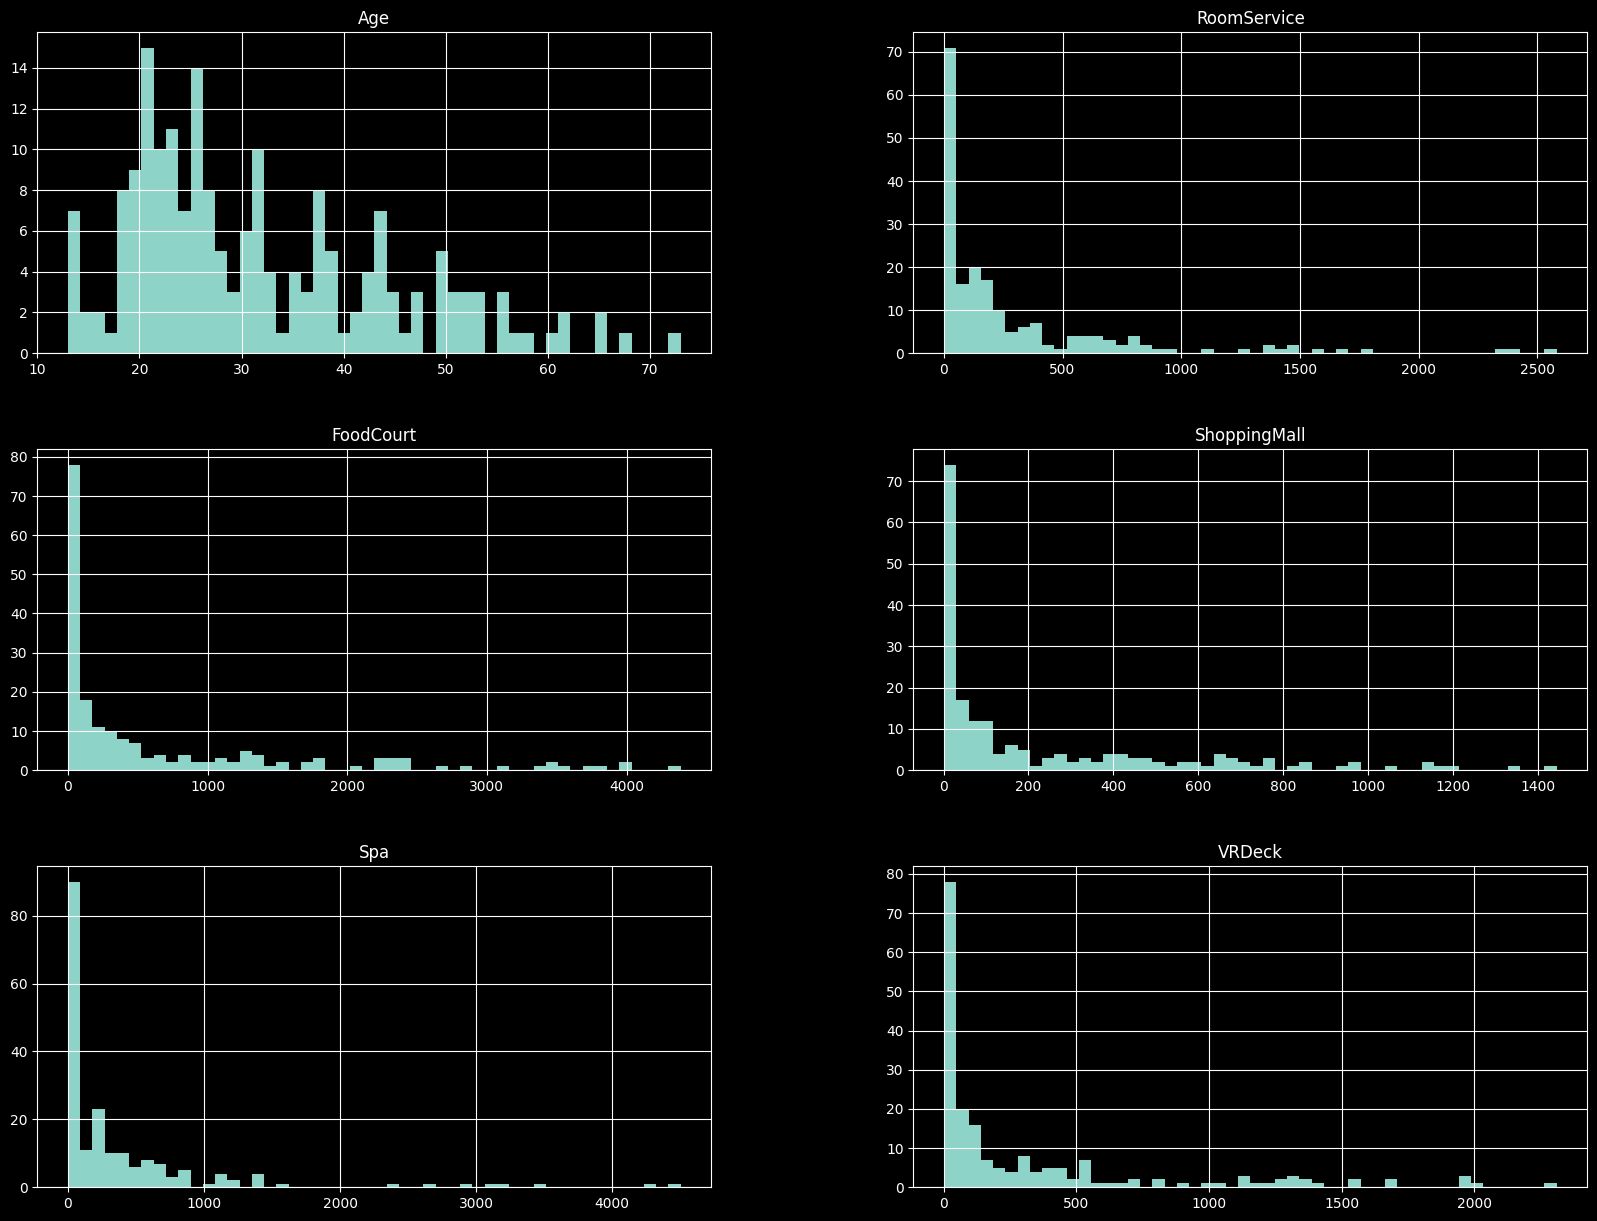

In [34]:
#simple remove of outers

train_filtered = train.copy()
#remove outers from VRDeck
train_filtered = train_filtered[train_filtered.VRDeck > train_filtered.VRDeck.quantile(0.25)]
#remove outers from Spa
train_filtered = train_filtered[train_filtered.Spa > train_filtered.Spa.quantile(0.25)]
#remove outers from RoomService
train_filtered = train_filtered[train_filtered.RoomService > train_filtered.RoomService.quantile(0.25)]
#remove outers from ShoppingMall
train_filtered = train_filtered[train_filtered.ShoppingMall > train_filtered.ShoppingMall.quantile(0.25)]
#remove outers from FoodCourt
train_filtered = train_filtered[train_filtered.FoodCourt > train_filtered.FoodCourt.quantile(0.25)]
train_filtered.hist(bins=50, figsize=(20,15))
plt.show()
#and filter > 95%
train_filtered = train_filtered[train_filtered.VRDeck < train_filtered.VRDeck.quantile(0.95)]
train_filtered = train_filtered[train_filtered.Spa < train_filtered.Spa.quantile(0.95)]
train_filtered = train_filtered[train_filtered.RoomService < train_filtered.RoomService.quantile(0.95)]
train_filtered = train_filtered[train_filtered.ShoppingMall < train_filtered.ShoppingMall.quantile(0.95)]
train_filtered = train_filtered[train_filtered.FoodCourt < train_filtered.FoodCourt.quantile(0.95)]




train_filtered.hist(bins=50, figsize=(20,15))
plt.show()

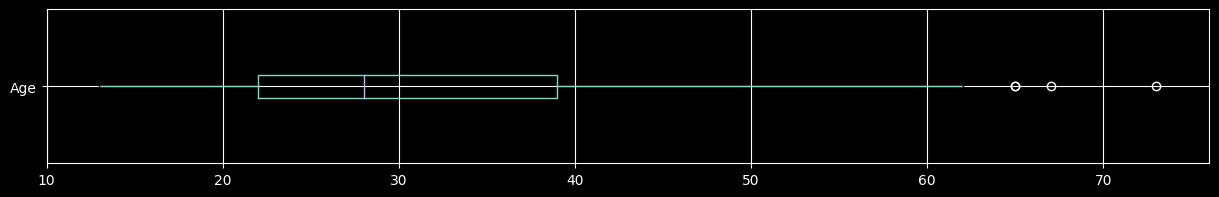

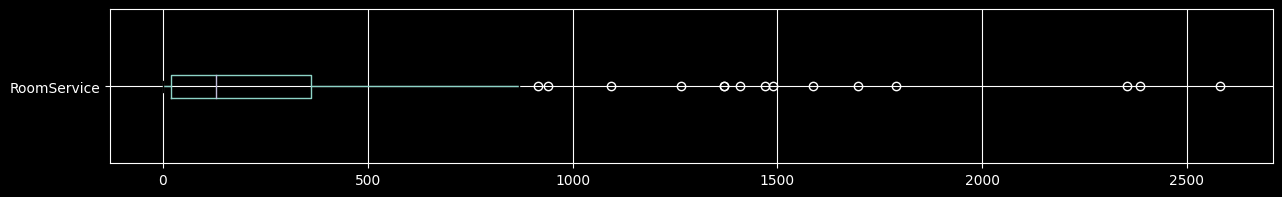

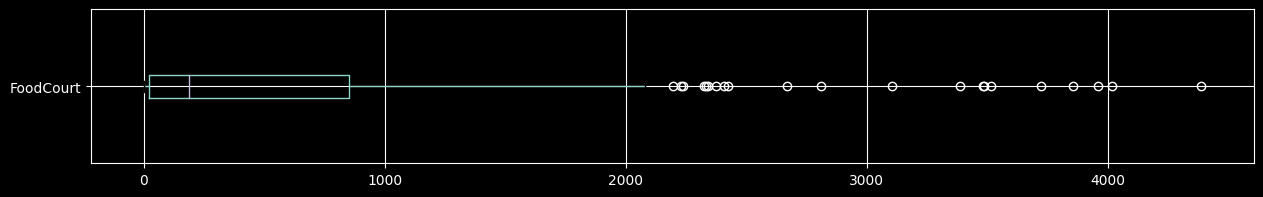

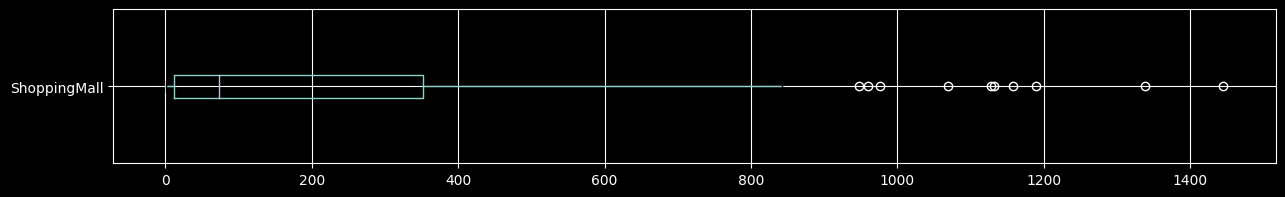

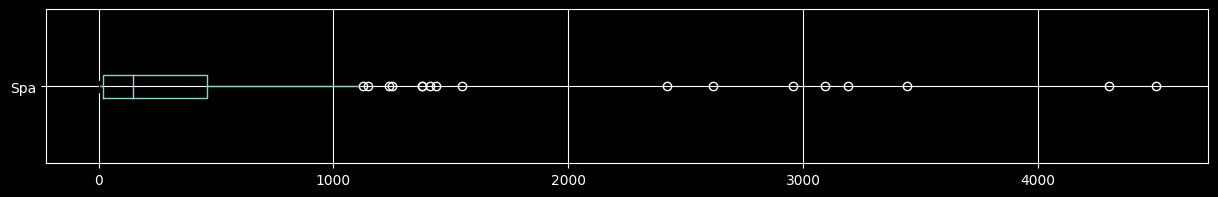

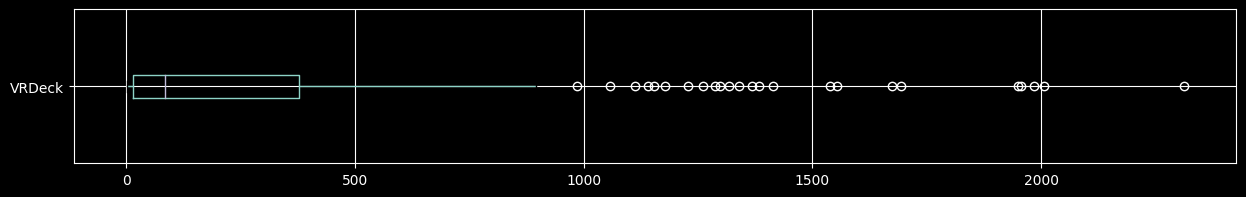

In [33]:
import matplotlib.pyplot as plt

# draw boxplots for all numeric columns horizontally
for col in train_filtered.select_dtypes(include=['float64','int64']).columns:
    train_filtered.boxplot(column=col, vert=False, figsize=(15,2))
    plt.show()

<AxesSubplot: xlabel='Transported', ylabel='count'>

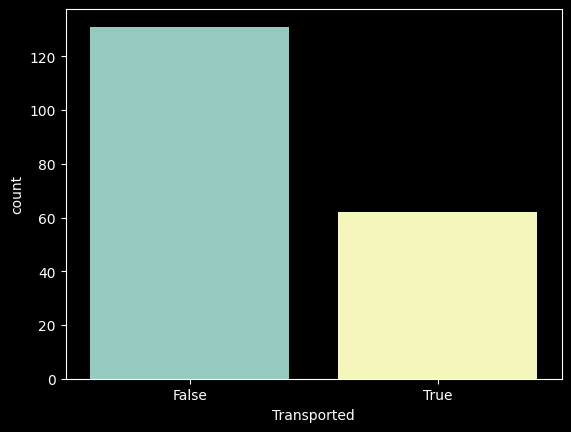

In [35]:
#grafico transported
sns.countplot(x='Transported', data=train_filtered)

In [37]:
N_transp_true = train_filtered[train_filtered['Transported'] == 1].shape[0]
N_transp_false = train_filtered[train_filtered['Transported'] == 0].shape[0]

print('metrica >' , 1-(N_transp_true/(N_transp_true+N_transp_false)))

metrica > 0.6787564766839378


                   Age  RoomService  FoodCourt  ShoppingMall       Spa  \
Age           1.000000    -0.047262   0.091677     -0.059327  0.178213   
RoomService  -0.047262     1.000000  -0.083138      0.007626 -0.021863   
FoodCourt     0.091677    -0.083138   1.000000     -0.112969  0.023201   
ShoppingMall -0.059327     0.007626  -0.112969      1.000000  0.055628   
Spa           0.178213    -0.021863   0.023201      0.055628  1.000000   
VRDeck        0.163056     0.046775   0.226951     -0.062259  0.097989   
Transported  -0.115103    -0.122719   0.291198      0.128367 -0.181287   

                VRDeck  Transported  
Age           0.163056    -0.115103  
RoomService   0.046775    -0.122719  
FoodCourt     0.226951     0.291198  
ShoppingMall -0.062259     0.128367  
Spa           0.097989    -0.181287  
VRDeck        1.000000    -0.113912  
Transported  -0.113912     1.000000  


/tmp/ipykernel_32/844498082.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_filtered.corr()


<AxesSubplot: >

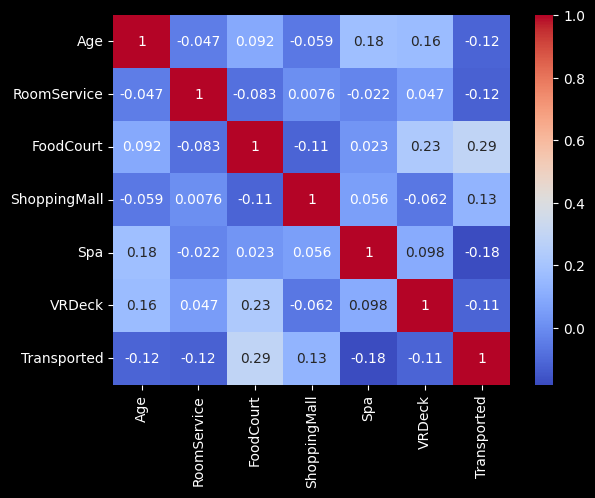

In [39]:
# Calcular la matriz de correlación
corr_matrix = train_filtered.corr()
print(corr_matrix)
# Crear el gráfico de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
14,0011_01,Earth,False,F/2/P,TRAPPIST-1e,28.0,False,8.0,974.0,12.0,2.0,7.0,Elle Bertsontry,True
56,0061_01,Earth,False,F/12/S,TRAPPIST-1e,22.0,False,45.0,1096.0,148.0,1377.0,1.0,Shanya Salez,False
110,0114_01,Earth,False,G/20/S,TRAPPIST-1e,27.0,False,82.0,157.0,429.0,238.0,1.0,Maura Beckerson,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9139_01,Mars,False,F/1766/S,TRAPPIST-1e,25.0,False,410.0,32.0,14.0,1239.0,10.0,Poselk Paste,False
8618,9196_02,Europa,False,C/339/S,TRAPPIST-1e,31.0,False,1.0,104.0,1338.0,698.0,126.0,Majorab Poustive,True
8619,9196_03,Europa,False,C/339/S,TRAPPIST-1e,23.0,False,381.0,794.0,52.0,654.0,1317.0,Chellus Poustive,False
8657,9234_01,Earth,False,G/1500/P,TRAPPIST-1e,49.0,False,6.0,1.0,638.0,1107.0,23.0,Catha Bushins,False


In [40]:
import tensorflow as tf
#optimizador
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta, Adamax, Nadam, Ftrl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

# Seleccionar características y etiquetas
X = train_filtered.astype(float)
y = train_filtered['Transported'].astype(int)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler =  MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='tanh', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
#lr = 0.01
model.compile(optimizer= Adagrad(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train_scaled, y_train, epochs=10, batch_size=2, validation_data=(X_test_scaled, y_test))


ValueError: could not convert string to float: 'Earth'

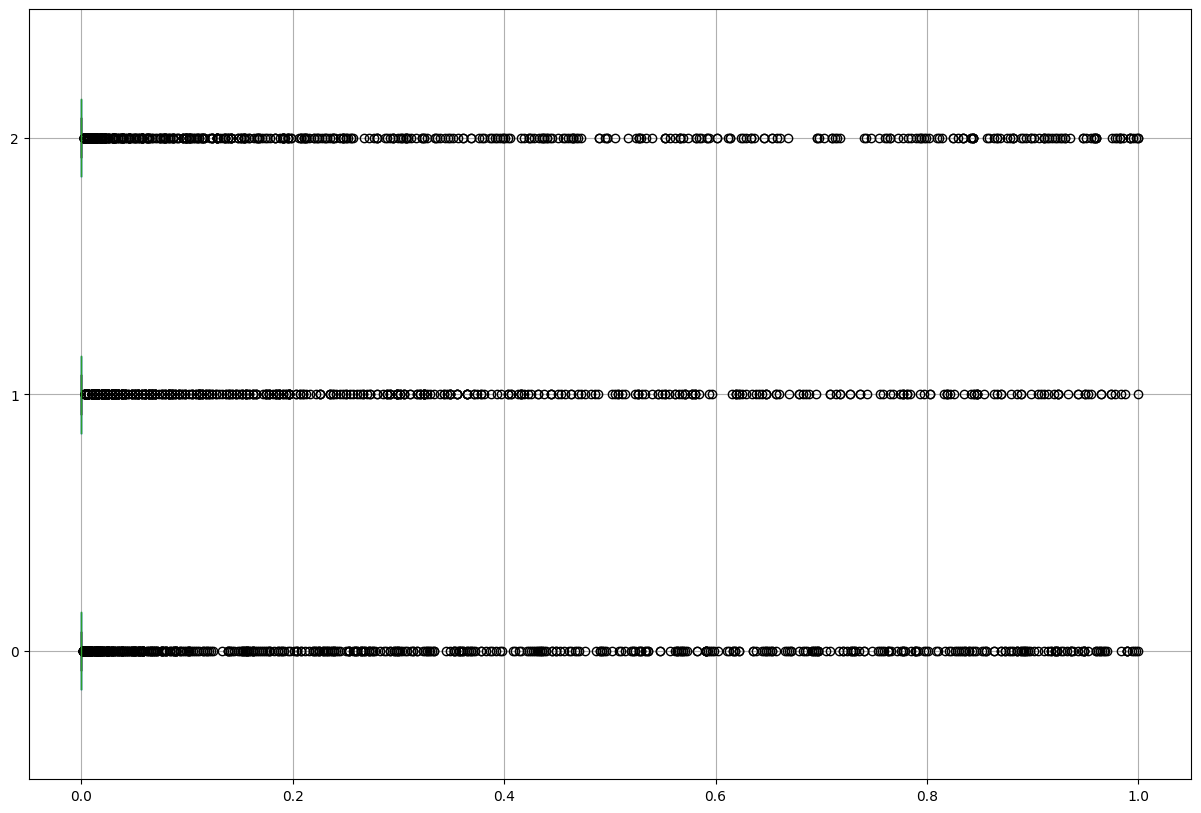

In [47]:
import matplotlib.pyplot as plt

# draw boxplots for all numeric columns horizontally
pd.DataFrame(X_train_scaled).boxplot(vert=False, figsize=(15,10))
plt.show()

In [53]:
# add to test column transported
test = pd.read_csv('test.csv')
test['Transported'] = model.predict(scaler.transform(test[['RoomService', 'Spa', 'VRDeck']]))
test['Transported']  = test['Transported'].apply(lambda x: 1 if x > 0.5 else 0)
test['Transported'] = test['Transported'].astype(bool)

#save test
test[['PassengerId','Transported']].to_csv('test_send.csv', index=False)
test.head()

134/134 [==============================] - 0s 990us/step


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,True
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,False
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,True
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,False
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,True
